Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import os
import shutil

import random
import re
import glob
from PIL import Image,ImageDraw,ImageFont

import ENVCONFIG

/eos/home-d/drousso/SWAN_projects/Other/GANji
DAVID


User settings:

In [2]:
onlyusenewfonts=True

characters=["福"]
characters=["體","福","新","年","快","樂","身","健","康","心","想","事","成"]

IMG_WIDTH = 300
IMG_HEIGHT = 300
text_size = 150
text_size = 200

maxplotstoshow=1e6
showonlyfirstcharacter=True

environment settings:

In [3]:
df = pd.read_csv('google-fonts-annotation.csv')

# change your path here
rds_dir = ENVCONFIG.rds_dir
ROOT = rds_dir+'/fonts/ofl'

new_fonts_dir="new_fonts"

define font filtering & retrieval function

In [4]:
def filter_fonts_get_paths(df, root='./', variants=['_'], subsets=['_'], category=''):
    # exceptions
    if not variants or variants == [''] or variants == '': variants = ['_']
    if not subsets or subsets == [''] or subsets == '': subsets = ['_']
    # apply filters
    regex_filters = variants + subsets + ['_'+category]
    df_new = pd.concat([df.filter(regex=re.compile(regex, re.IGNORECASE), axis=1).sum(axis=1).astype(bool) for regex in regex_filters], axis=1)
    mask = df_new.all(axis=1)
    filtered_fontnames = list(df.loc[mask].family)
    # construct file paths
    paths = []
    for fontname in filtered_fontnames:
        if variants == ['_']: # select all variants
            sel = glob.glob(f'{root}/{fontname.lower()}/**/**/**/*.ttf', recursive=True)
            paths.extend(sel)
        else:
            for variant in variants:
                sel = glob.glob(f'{root}/{fontname.lower()}/**/**/{fontname}-{variant}.ttf', recursive=True) 
                for path in sel:
                    paths.append(path)
    print(f'Found {len(paths)} font files.')
    return paths

Define font blacklist

In [5]:
fontblacklist=[
    #"福"
    'OtomanopeeOne-Regular',
    'PaletteMosaic-Regular',
    'Rock3D-Regular',
    'Shizuru-Regular',
    'YujiHentaiganaAkari-Regular',
    'YujiHentaiganaAkebono-Regular',
    
    #"體"
    'TrainOne-Regular',
    'SawarabiMincho-Regular',
    'Murecho[wght]'
]

Create data for list of characters

Found 90 font files.

Starting 體
text w & h:  200 232
0 78 200 232
text w & h:  186 166
0 -3 186 166

Starting 福
text w & h:  203 233
-3 79 200 233
text w & h:  186 157
0 7 186 157

Starting 新
text w & h:  200 234
0 78 200 234
text w & h:  186 162
0 2 186 162

Starting 年
text w & h:  200 233
0 76 200 233
text w & h:  186 164
0 1 186 164

Starting 快
text w & h:  200 234
0 78 200 234
text w & h:  186 155
0 18 186 155

Starting 樂
text w & h:  203 234
-3 77 200 234
text w & h:  186 167
0 -3 186 167

Starting 身
text w & h:  200 234
0 77 200 234
text w & h:  186 165
0 -10 186 165

Starting 健
text w & h:  203 235
-3 78 200 235
text w & h:  186 157
0 8 186 157

Starting 康
text w & h:  200 235
0 78 200 235
text w & h:  186 167
0 -3 186 167

Starting 心
text w & h:  205 233
-4 78 201 233
text w & h:  186 155
0 41 186 155

Starting 想
text w & h:  203 234
-2 78 201 234
text w & h:  186 155
0 12 186 155

Starting 事
text w & h:  200 232
0 78 200 232
text w & h:  186 164
0 0 186 164

Starting 成
text w

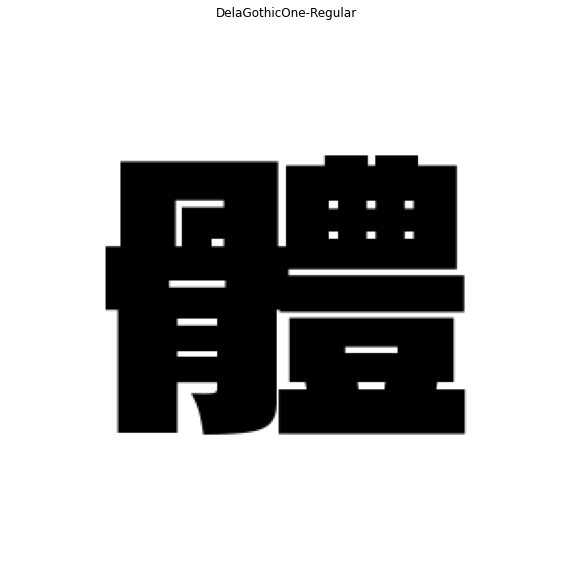

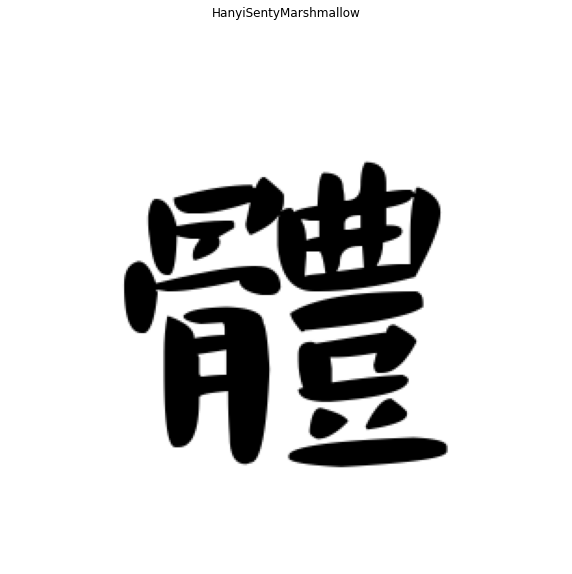

In [19]:
if onlyusenewfonts:
    paths=[]
else:
    paths = filter_fonts_get_paths(df, root=ROOT, subsets=['japanese'], variants=['_'], category='')
    
paths = filter_fonts_get_paths(df, root=ROOT, subsets=['japanese'], variants=['_'], category='')[0:1]
paths.extend([os.path.join(new_fonts_dir,font) for font in os.listdir(new_fonts_dir)])

dontshowplots=False
for text in characters:
    print()
    print('Starting',text)
    
    characterfolder=os.path.join('data',text)
    shutil.rmtree(characterfolder)
    try:
        os.mkdir(characterfolder)
    except:
        pass
    
    
    for r in range(len(paths)):
        # sample text and font

        fontname=os.path.basename(paths[r]).split('.ttf')[0] 
        if fontname in fontblacklist:
            print(fontname,'is in blacklist')
            continue
            
        font = ImageFont.truetype(paths[r], text_size)

        # # get text info (not being used but may be useful)
        text_width, text_height = font.getsize(text)
        left, top, right, bottom = font.getbbox(text)
        print('text w & h: ', text_width, text_height)
        print(left, top, right, bottom)



        x = (right-left) # we can adjust this according to IMG_WIDTH etc
        y = IMG_HEIGHT/2 +(bottom-top)/2

        # create a blank canvas with extra space between lines
        canvas = Image.new('RGB', (IMG_WIDTH, IMG_HEIGHT), "white")

        # draw the text onto the text canvas
        draw = ImageDraw.Draw(canvas)
        x=IMG_WIDTH/2
        #y=IMG_HEIGHT/2
        draw.text((x, y), text, 'black', font, anchor='ms')

        fig = plt.figure(figsize=(10,10))
        plt.imshow(canvas, aspect='auto')
        plt.axis('off')
        plt.margins(0)
        
        filename = os.path.join(characterfolder,fontname+'.jpg')

        plt.savefig(filename,bbox_inches='tight',pad_inches=0)
        plt.title(fontname)
        # plt.imsave(filename, canvas, cmap='gray')
        # plt.imsave(filename, canvas)
        if r>maxplotstoshow or dontshowplots:
            plt.close()
    if showonlyfirstcharacter:
        dontshowplots=True